In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# df = ohe.fit_transform(df[['sex', 'smoker', 'region']])
# print(df)

import category_encoders as ce
encoder = ce.OneHotEncoder(df, cols=['sex', 'region','smoker'], use_cat_names=True)

df = encoder.fit_transform(df)
df

,age,sex_female,sex_male,bmi,children,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,charges
0,19,1,0,27.900,0,1,0,1,0,0,0,16884.92400
1,18,0,1,33.770,1,0,1,0,1,0,0,1725.55230
2,28,0,1,33.000,3,0,1,0,1,0,0,4449.46200
3,33,0,1,22.705,0,0,1,0,0,1,0,21984.47061
4,32,0,1,28.880,0,0,1,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,1,30.970,3,0,1,0,0,1,0,10600.54830
1334,18,1,0,31.920,0,0,1,0,0,0,1,2205.98080
1335,18,1,0,36.850,0,0,1,0,1,0,0,1629.83350
1336,21,1,0,25.800,0,0,1,1,0,0,0,2007.94500


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# df[['age','bmi','charges', 'children']] = scaler.fit_transform(df[['age','bmi', 'charges', 'children']])
df.iloc[:,:] = scaler.fit_transform(df.iloc[:, 0:])
df

,age,sex_female,sex_male,bmi,children,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,charges
0,-1.438764,1.010519,-1.010519,-0.453320,-0.908614,1.970587,-1.970587,1.765481,-0.611324,-0.566418,-0.565267,0.298584
1,-1.509965,-0.989591,0.989591,0.509621,-0.078767,-0.507463,0.507463,-0.566418,1.635795,-0.566418,-0.565267,-0.953689
2,-0.797954,-0.989591,0.989591,0.383307,1.580926,-0.507463,0.507463,-0.566418,1.635795,-0.566418,-0.565267,-0.728675
3,-0.441948,-0.989591,0.989591,-1.305531,-0.908614,-0.507463,0.507463,-0.566418,-0.611324,1.765481,-0.565267,0.719843
4,-0.513149,-0.989591,0.989591,-0.292556,-0.908614,-0.507463,0.507463,-0.566418,-0.611324,1.765481,-0.565267,-0.776802
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.989591,0.050297,1.580926,-0.507463,0.507463,-0.566418,-0.611324,1.765481,-0.565267,-0.220551
1334,-1.509965,1.010519,-1.010519,0.206139,-0.908614,-0.507463,0.507463,-0.566418,-0.611324,-0.566418,1.769076,-0.914002
1335,-1.509965,1.010519,-1.010519,1.014878,-0.908614,-0.507463,0.507463,-0.566418,1.635795,-0.566418,-0.565267,-0.961596
1336,-1.296362,1.010519,-1.010519,-0.797813,-0.908614,-0.507463,0.507463,1.765481,-0.611324,-0.566418,-0.565267,-0.930362


In [5]:
df.isnull().sum()

age                 0
sex_female          0
sex_male            0
bmi                 0
children            0
smoker_yes          0
smoker_no           0
region_southwest    0
region_southeast    0
region_northwest    0
region_northeast    0
charges             0
dtype: int64

In [6]:
# df[['bmi', 'charges']] = df[['bmi', 'charges']].apply(np.int64)
# df

In [7]:
result = df.dtypes
result

age                 float64
sex_female          float64
sex_male            float64
bmi                 float64
children            float64
smoker_yes          float64
smoker_no           float64
region_southwest    float64
region_southeast    float64
region_northwest    float64
region_northeast    float64
charges             float64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

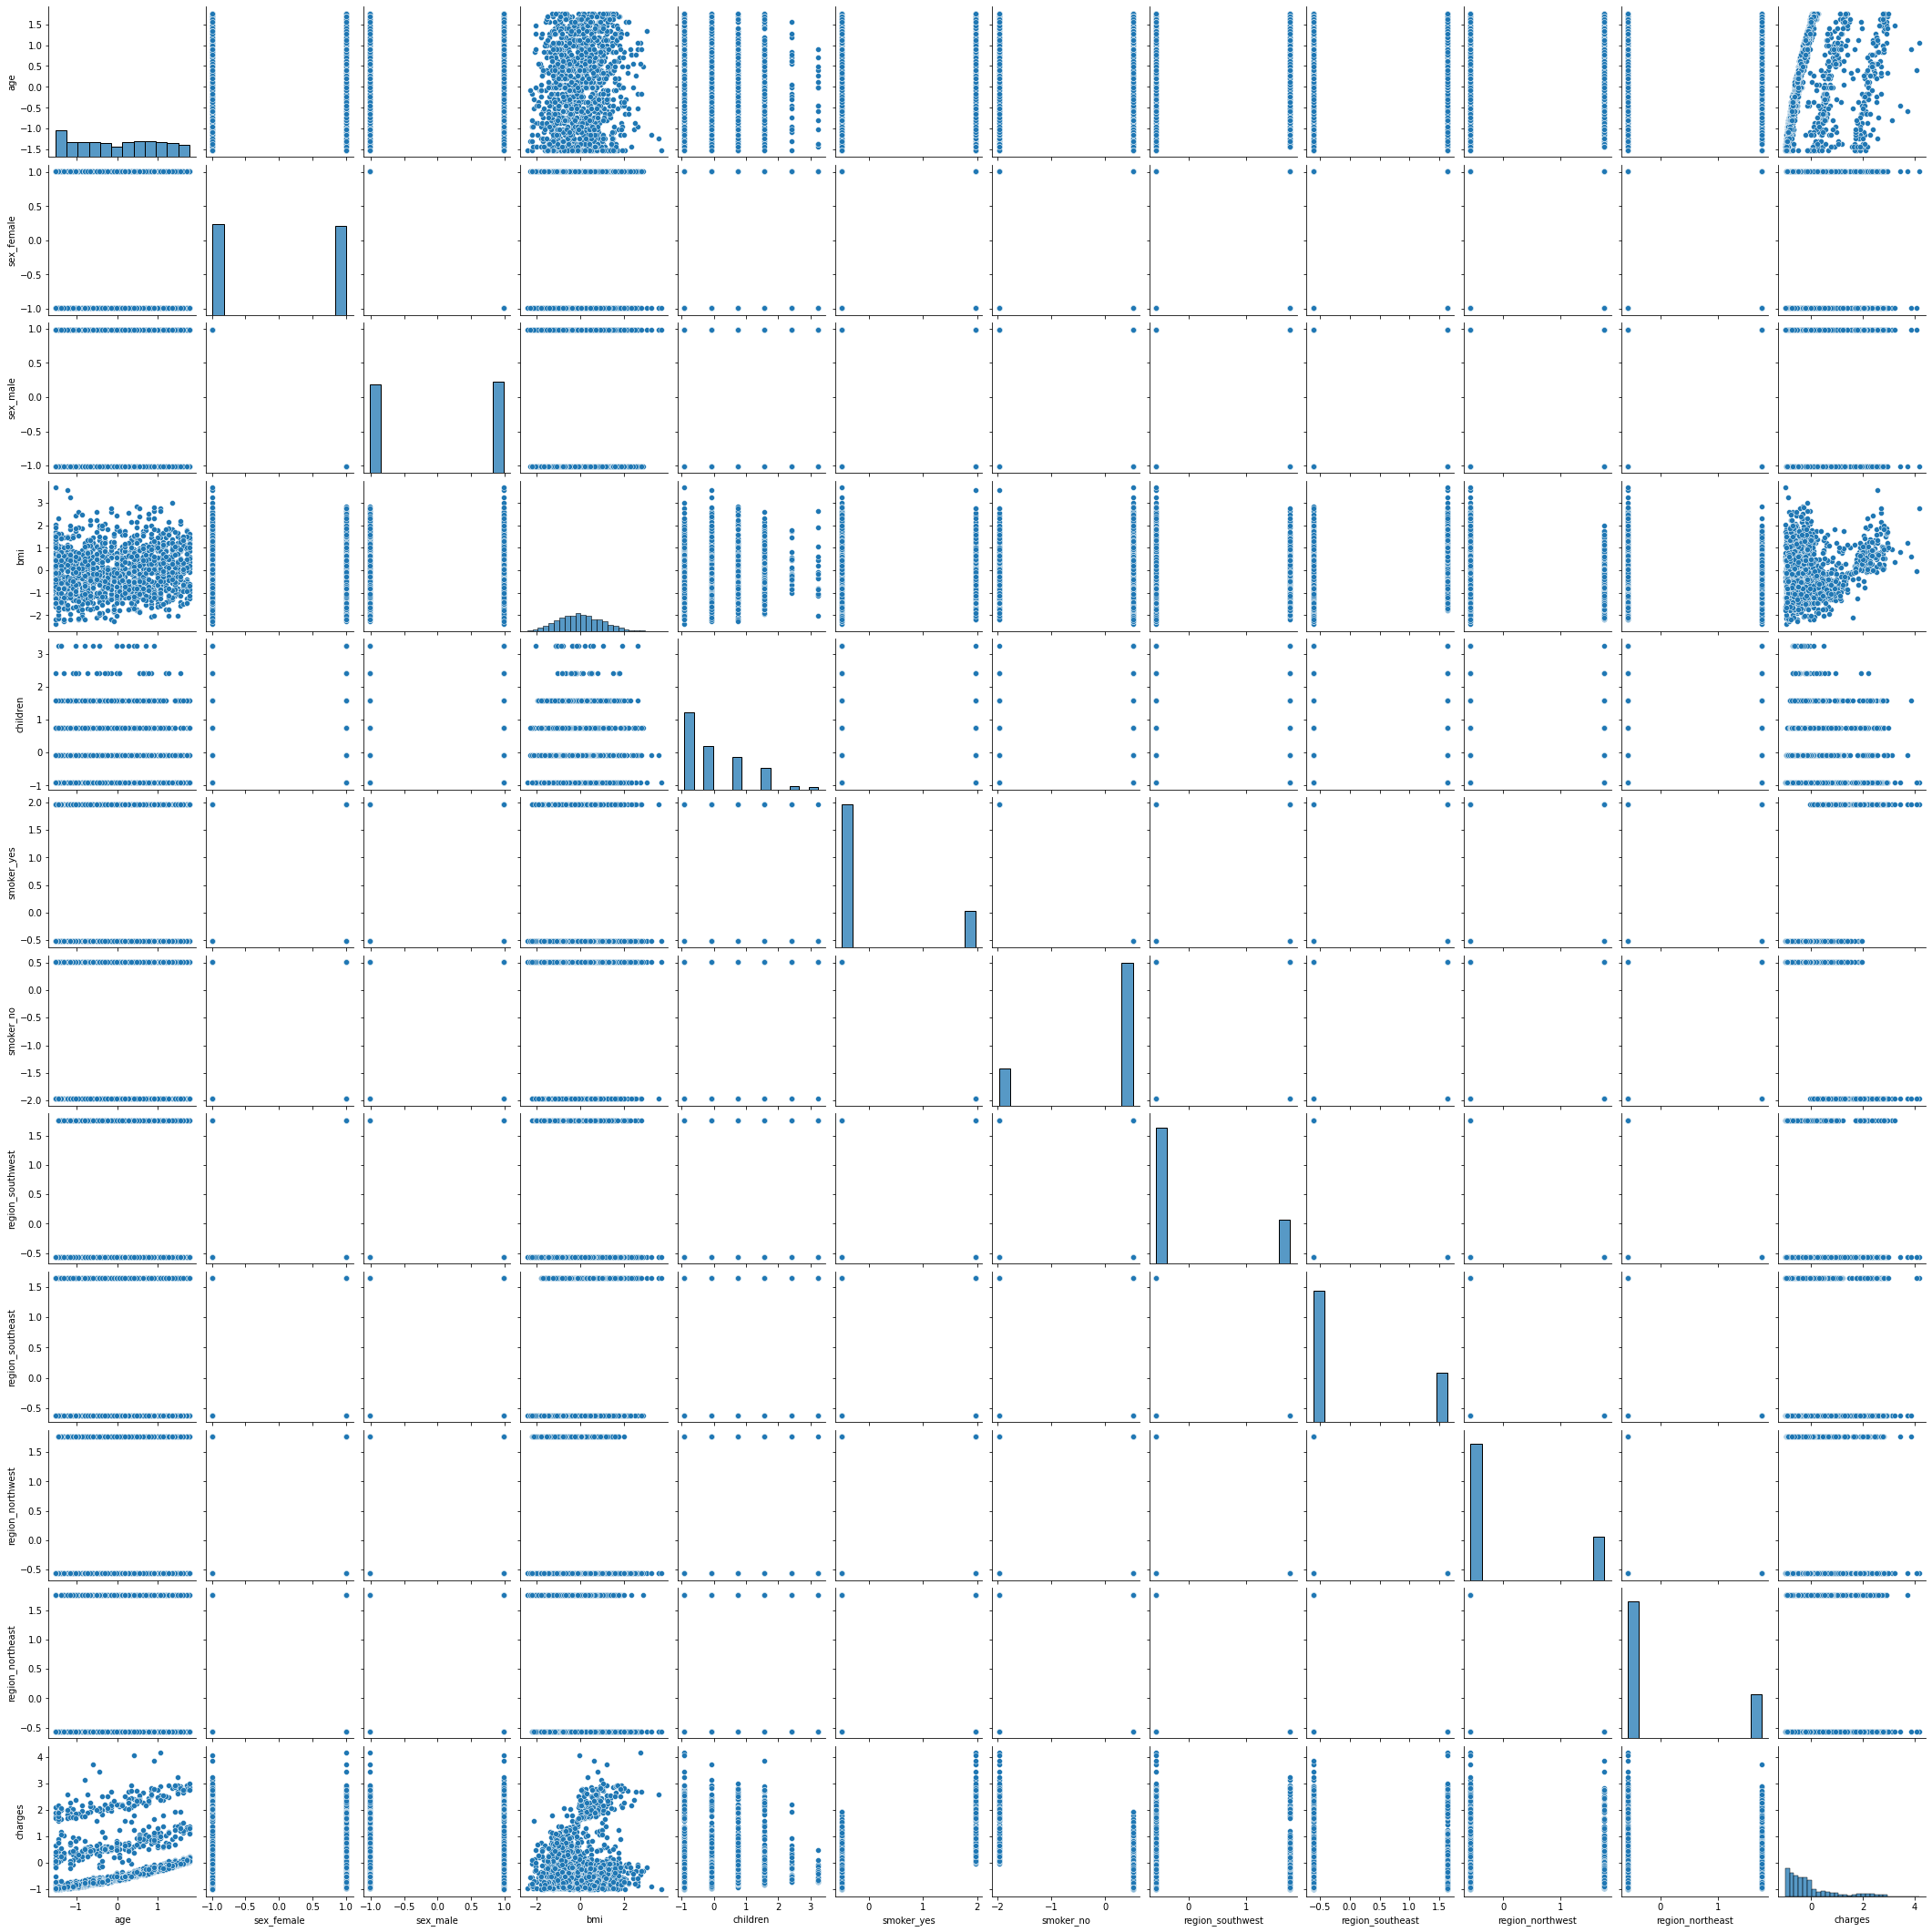

In [9]:
#sn.pairplot(df, vars=['sex_female', 'sex_male', 'charges'])
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

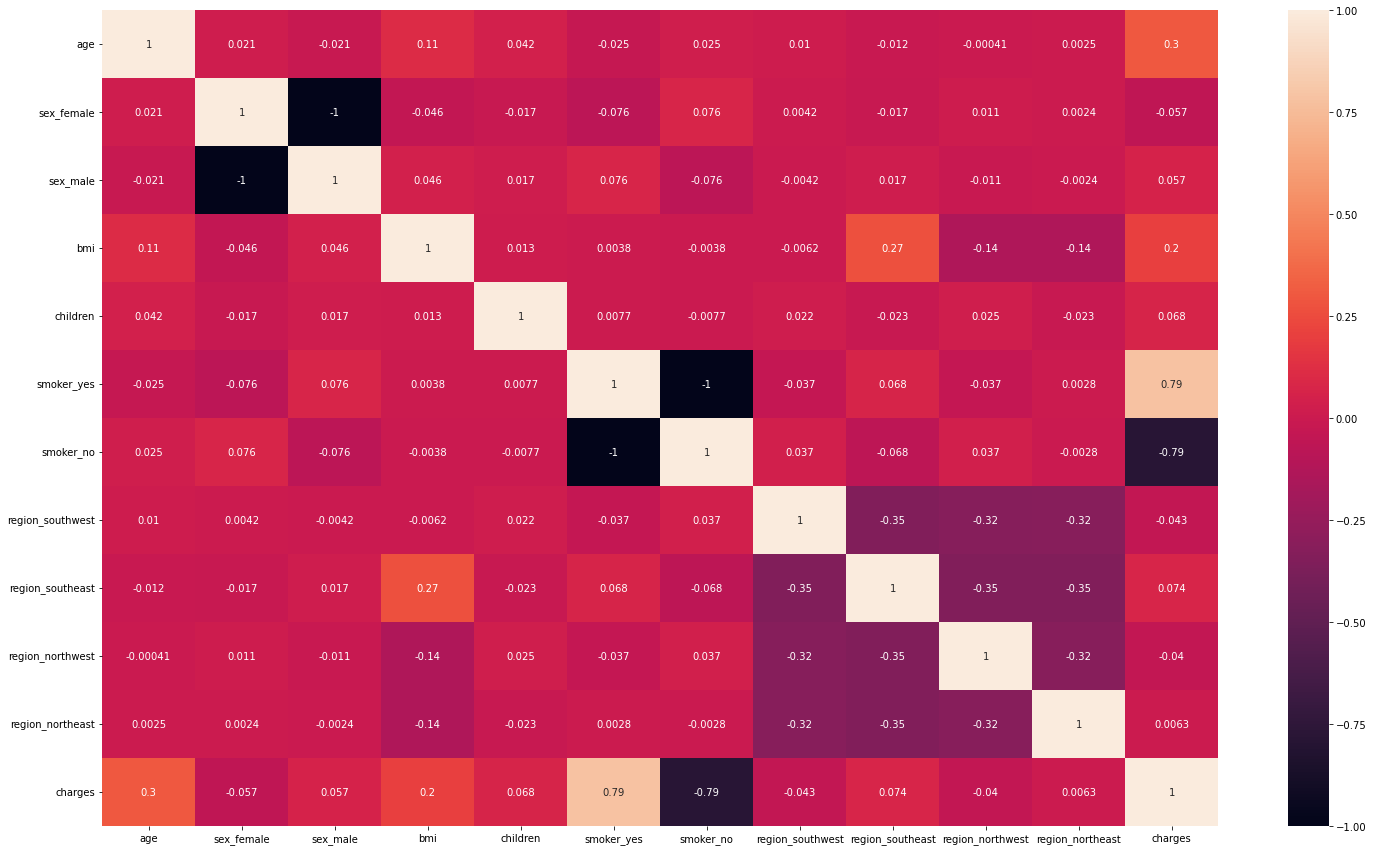

In [10]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show

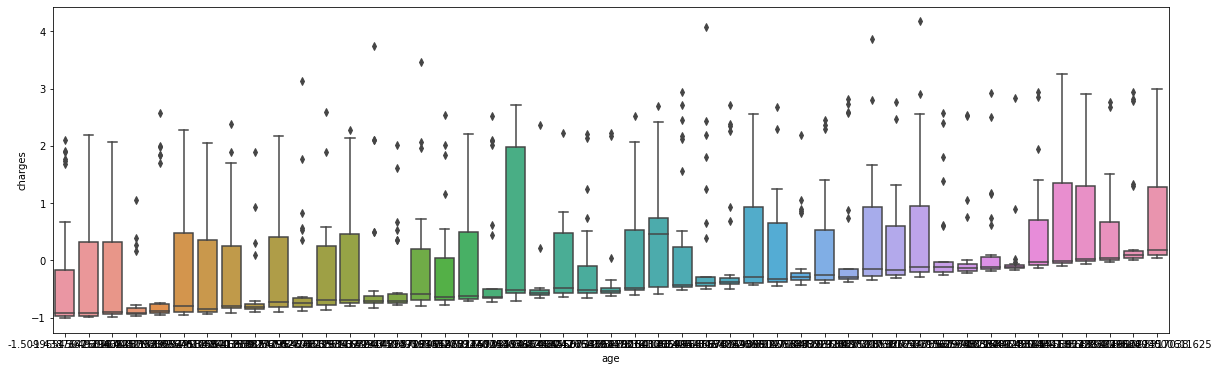

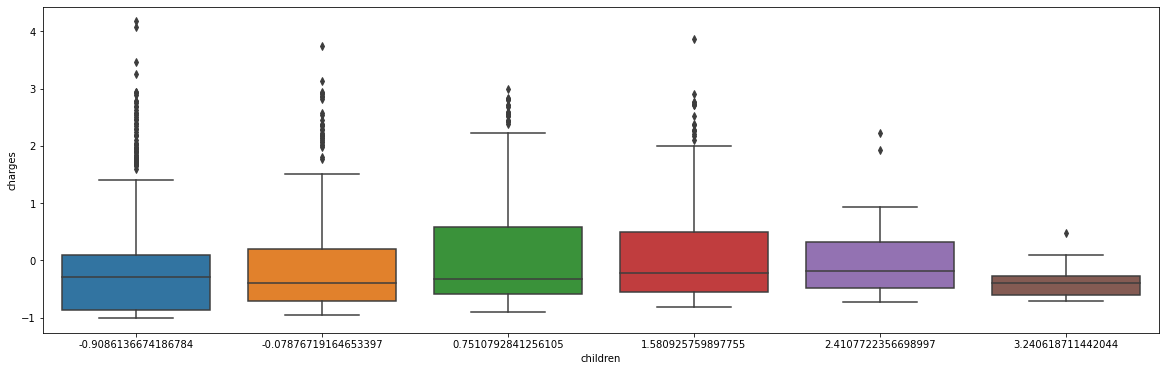

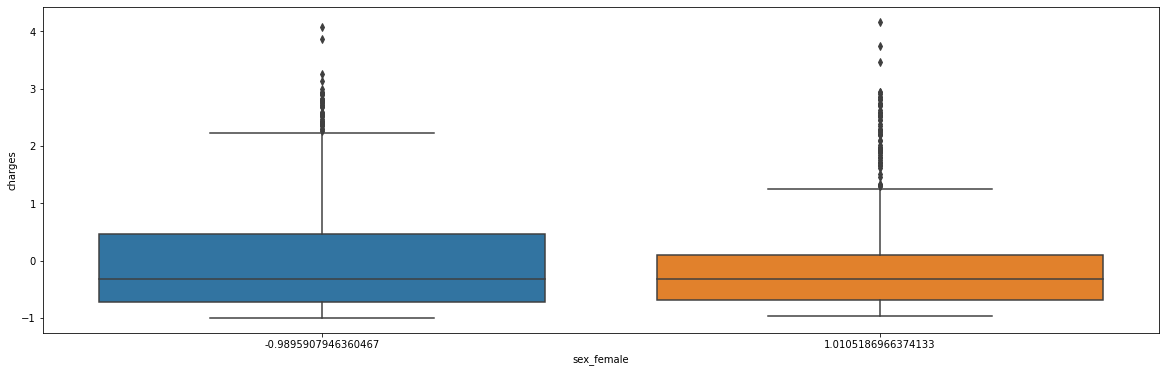

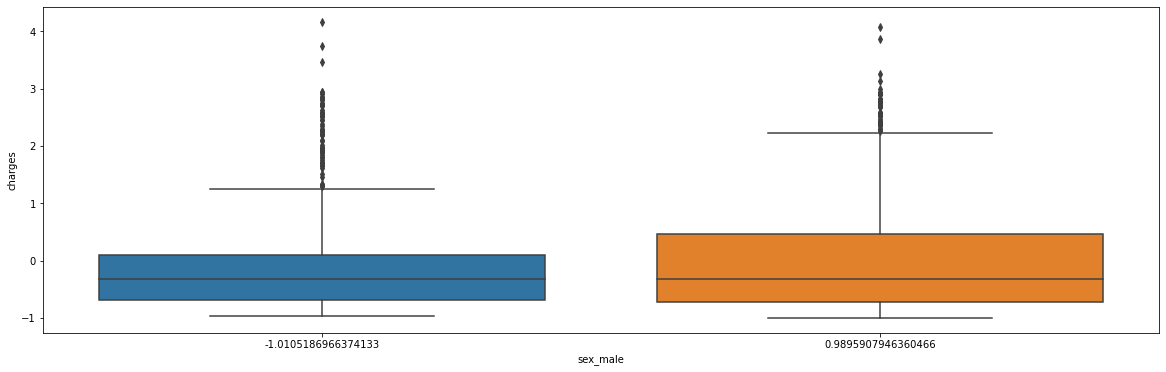

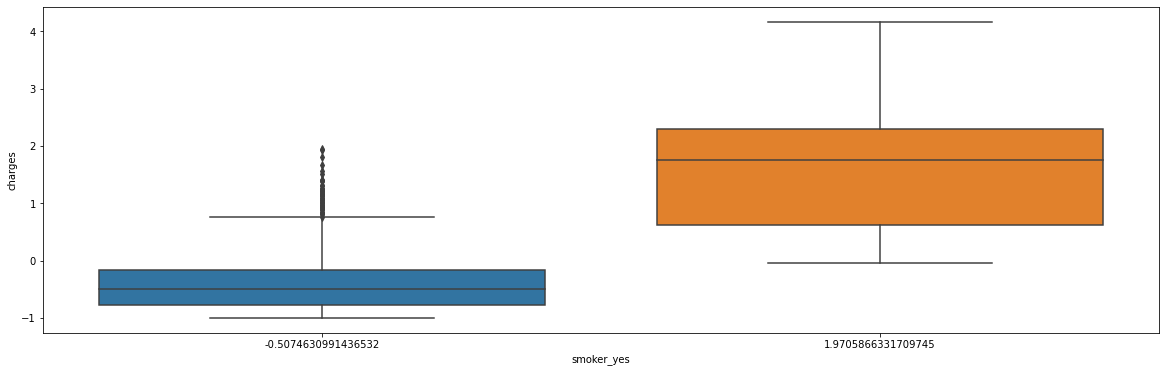

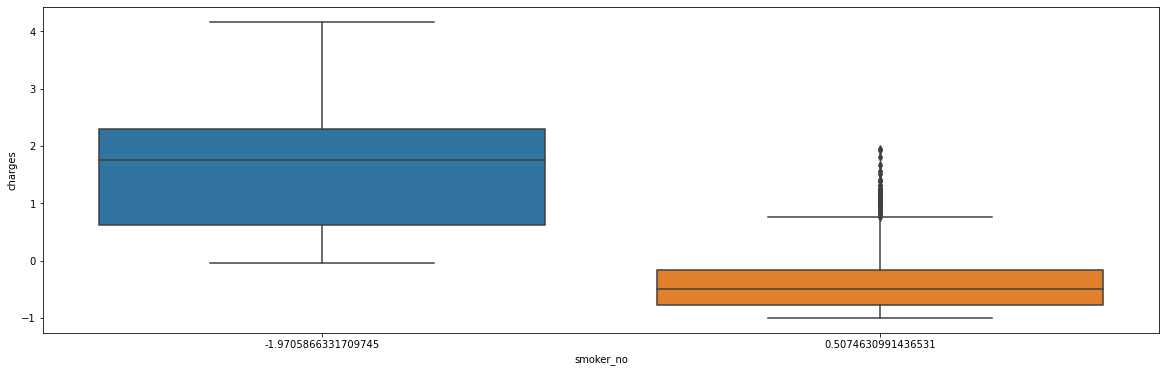

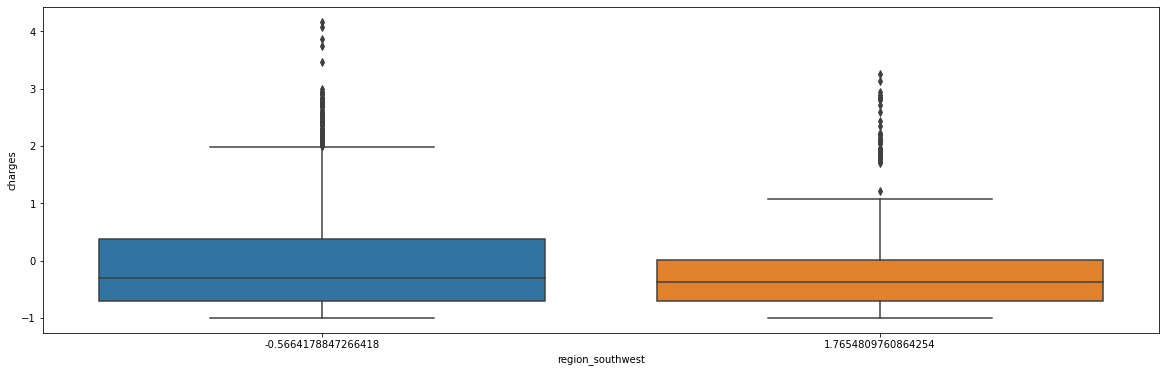

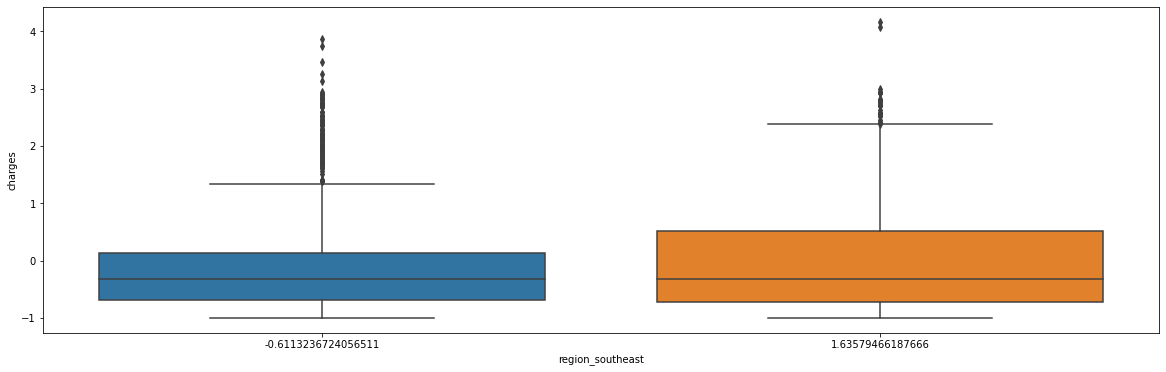

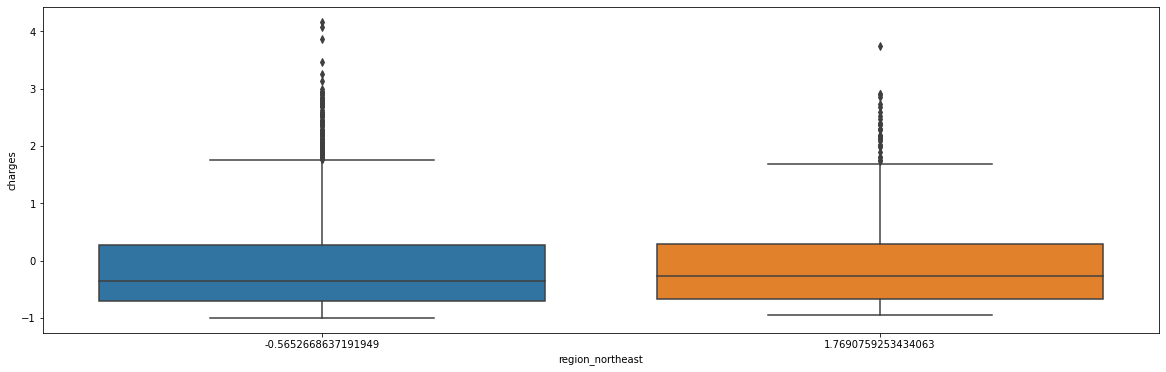

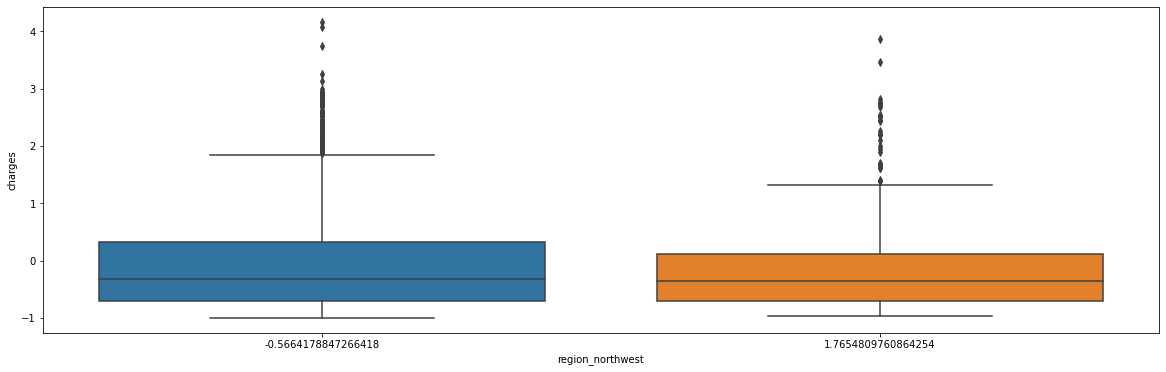

In [11]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=df)

cols = ['age', 'children', 'sex_female', 'sex_male', 'smoker_yes', 'smoker_no', 'region_southwest', 'region_southeast', 
       'region_northeast', 'region_northwest']
for col in cols:
    plt.figure(figsize=(20,6))
    sns.boxplot(x = df[col], y = df['charges'])


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_columns = 11
X = df.iloc[:, 1:x_columns].values
y = df['charges'].values

train_ratio = 0.80
test_ratio = 0.20
validation_ratio = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = validation_ratio, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(669, 10)
(268, 10)
(669, 10)


In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_)



t_model = DecisionTreeRegressor(criterion='mse', max_depth = 2, random_state= 0)
t_model.fit(X_train, y_train)
y_pred = t_model.predict(X_test)
score = t_model.score(X_valid, y_valid)
t_r2_score = r2_score(y_test,y_pred)
print(t_r2_score)

t_mse = mean_squared_error(y_test, y_pred)
t_mae = mean_squared_error(y_test, y_pred)
print(f'The Mean Squared Error is: {t_mse}\n The Mean Absolute Error is: {t_mae}')

best score and parameter:  0.7594336491408509 {'max_depth': 3}
0.8112691066405151
The Mean Squared Error is: 0.20494181096709566
 The Mean Absolute Error is: 0.20494181096709566


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [15]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10)}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)

clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_)
parameters = {'n_estimators':range(10,100,10)}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_)


rt_model = RandomForestRegressor(n_estimators = 25, max_depth = 3, criterion = 'mse')
rt_model.fit(X_train, y_train)
rt_y_pred = rt_model.predict(X_test)
rt_score = rt_model.score(X_valid, y_valid)
rt_r2_score = r2_score(y_test, rt_y_pred)
rt_r2_score
rt_mse = mean_squared_error(y_test, y_pred)
rt_mae = mean_squared_error(y_test, y_pred)
print (rt_r2_score)
print(f'The Mean Squared Error is: {rt_mse}\n The Mean Absolute Error is: {rt_mae}')

best score and parameter:  0.710072383248731 {'n_estimators': 90}
best score and parameter:  0.7129847164838581 {'n_estimators': 90}
0.8069093375819532
The Mean Squared Error is: 0.20494181096709566
 The Mean Absolute Error is: 0.20494181096709566


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [16]:
from sklearn.svm import SVR
svr_best_score = 0
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}

svr_model = GridSearchCV(SVR(), param_grid)
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_r2_score = r2_score(y_test, svr_y_pred)
if svr_r2_score > svr_best_score:
    svr_best_score = svr_r2_score
svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_squared_error(y_test, y_pred)
print(svr_r2_score)
print(f'The Mean Squared Error is: {svr_mse}\n The Mean Absolute Error is: {svr_mae}')


0.7122030591444367
The Mean Squared Error is: 0.20494181096709566
 The Mean Absolute Error is: 0.20494181096709566


In [17]:
param_grid2 = {'C': [10],
              'gamma': [0.01],
              'kernel': ['poly']}

rbf_svr_model = GridSearchCV(SVR(), param_grid2)
rbf_svr_model.fit(X_train, y_train)
rbf_svr_y_pred = rbf_svr_model.predict(X_test)
rbf_svr_r2_score = r2_score(y_test, svr_y_pred)

rbf_svr_mse = mean_squared_error(y_test, y_pred)
rbf_svr_mae = mean_squared_error(y_test, y_pred)
print(svr_r2_score)
print(f'The Mean Squared Error is: {rbf_svr_mse}\n The Mean Absolute Error is: {rbf_svr_mae}')

0.7122030591444367
The Mean Squared Error is: 0.20494181096709566
 The Mean Absolute Error is: 0.20494181096709566
